In [69]:
text=open('Converting.txt',encoding='utf-8').read()

In [70]:
print(text)

I feel victimized because my current friend cheated on me.But now I am Happy


In [71]:
lower_case=text.lower()

In [72]:
print(lower_case)

i feel victimized because my current friend cheated on me.but now i am happy


In [73]:
import string

In [74]:
cleaned_text=lower_case.translate(str.maketrans('','',string.punctuation))

In [75]:
print(cleaned_text)

i feel victimized because my current friend cheated on mebut now i am happy


In [76]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [77]:
tokenized_words=cleaned_text.split()

In [78]:
print(tokenized_words)

['i', 'feel', 'victimized', 'because', 'my', 'current', 'friend', 'cheated', 'on', 'mebut', 'now', 'i', 'am', 'happy']


In [79]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [80]:
len(stop_words)

179

In [81]:
#REMOVING stopwords
final_words=[]    #creating a list

for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)

In [82]:
print(final_words)

['feel', 'victimized', 'current', 'friend', 'cheated', 'mebut', 'happy']


In [83]:
with open('emotion.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n",'').replace(",",'').replace("'",'').strip()
        word,emotion=clear_line.split(':')
        print("word : "+word+" "+"emotion : "+emotion)

word : victimized emotion :  cheated
word : accused emotion :  cheated
word : acquitted emotion :  singled out
word : adorable emotion :  loved
word : adored emotion :  loved
word : affected emotion :  attracted
word : afflicted emotion :  sad
word : aghast emotion :  fearful
word : agog emotion :  attracted
word : agonized emotion :  sad
word : alarmed emotion :  fearful
word : amused emotion :  happy
word : angry emotion :  angry
word : anguished emotion :  sad
word : animated emotion :  happy
word : annoyed emotion :  angry
word : anxious emotion :  attracted
word : apathetic emotion :  bored
word : appalled emotion :  angry
word : appeased emotion :  singled out
word : appreciated emotion :  esteemed
word : apprehensive emotion :  fearful
word : approved of emotion :  loved
word : ardent emotion :  lustful
word : aroused emotion :  lustful
word : attached emotion :  attached
word : attracted emotion :  attracted
word : autonomous emotion :  independent
word : awed emotion :  fearfu

In [84]:
emotion_list=[]
with open('emotion.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n",'').replace(",",'').replace("'",'').strip()
        word,emotion=clear_line.split(':')
        
        if word in final_words:
            emotion_list.append(emotion)

In [85]:
print(emotion_list)

[' cheated', ' cheated', ' happy', ' sad']


In [87]:
from collections import Counter
w=Counter(emotion_list)
print(w)

Counter({' cheated': 2, ' happy': 1, ' sad': 1})


In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\MURAHARI
[nltk_data]     ASHOK\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

--------------------------------------------------------
Emotion list
[' happy', ' esteemed', ' attached', ' adequate', ' independent', ' average', ' happy', ' loved']
--------------------------------------------------------

Frequency of emotions
Counter({' happy': 2, ' esteemed': 1, ' attached': 1, ' adequate': 1, ' independent': 1, ' average': 1, ' loved': 1})
--------------------------------------------------------

Sentiment Analysis
{'neg': 0.024, 'neu': 0.787, 'pos': 0.189, 'compound': 0.999}
--------------------------------------------------------

Positive Sentiment
---------------------------

Graphical Representation
---------------------------


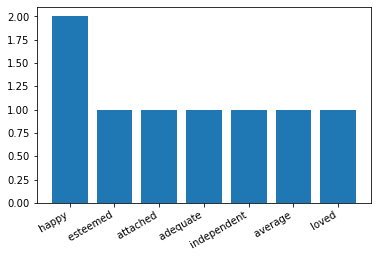

In [1]:
#importing all libraries
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer


#reading the text file or dataset
text=open('dataset.txt',encoding='utf-8').read()

#converting all letters to lowercase
lower_case=text.lower()

#clean the text such that there should be only letters present in the text
cleaned_text=lower_case.translate(str.maketrans('','',string.punctuation))


#tokenization :- divide the sentence into words
tokenized_words=cleaned_text.split()

#removing the stopwords in the text and store in the final_words list
stop_words=stopwords.words('english')
final_words=[]    #creating a list
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)
      
    
#open the emotion text file which has the all the emotions list
#and clean it such that only emotion type and emotion only visible
emotion_list=[]
with open('emotion.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n",'').replace(",",'').replace("'",'').strip()
        word,emotion=clear_line.split(':')
        
        #check whether the words of main text is presnt in the emotions list are not 
        if word in final_words:
            emotion_list.append(emotion)

print("--------------------------------------------------------")
print("Emotion list")
print(emotion_list)

#counting the emtions how many times they occur
w=Counter(emotion_list)
print("--------------------------------------------------------")
print("\nFrequency of emotions")
print(w)

# checking whether whole dataset is gives postive or negative
print("--------------------------------------------------------")
print("\nSentiment Analysis")
def sentiment_analyse(sentiment_text):
    score=SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    print(score)
    neg=score['neg']
    pos=score['pos']
    if neg>pos:
        print("--------------------------------------------------------")
        print("\nNegative Sntiment")
    elif pos>neg:
        print("--------------------------------------------------------")
        print("\nPositive Sentiment")
    else:
        print("--------------------------------------------------------")
        print("\nNeutral Vibe")

sentiment_analyse(cleaned_text)

#representing in the graph
print("---------------------------")
print("\nGraphical Representation")
print("---------------------------")
fig,ax1=plt.subplots()
ax1.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()